In [2]:
import numpy as np
import scipy as sp
from SimPEG import Mesh, PF, Maps
import matplotlib.pyplot as plt

In [64]:
# Create a 3D mesh
mesh = Mesh.TensorMesh([np.ones(8),np.ones(8),np.ones(8)], x0='CC0')
mesh.x0 = np.r_[mesh.x0[:2], -np.sum(mesh.hz)]
# Create random points
locs = np.random.randn(10,3)
locs[:,2] -= locs[:, 2].min() - 0.1

rxLoc_t = PF.BaseGrav.RxObs(locs)
srcField = PF.BaseGrav.SrcField([rxLoc_t])
survey = PF.BaseGrav.LinearSurvey(srcField)
        
# Create a J matrix
prob = PF.Gravity.GravityIntegral(
    mesh, rhoMap=Maps.IdentityMap(nP=mesh.nC), actInd=np.ones(mesh.nC, dtype='bool'),
    )

prob.pair(survey)
J = prob.G


Begin linear forward calculation: z
Done 0.0 %
Done 10.0 %
Done 20.0 %
Done 30.0 %
Done 40.0 %
Done 50.0 %
Done 60.0 %
Done 70.0 %
Done 80.0 %
Done 90.0 %
Linear forward calculation ended in: 0.015495777130126953 sec


In [65]:
locs, mesh.vectorCCx




(array([[-1.02716358, -0.57611533,  2.69912813],
        [-1.22352764, -1.60954727,  4.35402471],
        [ 0.66824557,  0.35276143,  1.82462036],
        [ 1.3378991 , -0.19218177,  0.1       ],
        [ 0.31477982, -0.47528302,  1.76670534],
        [ 1.85017161,  1.03647137,  4.47797041],
        [-0.65640204, -0.66154892,  4.22761822],
        [-0.31371063, -0.28274042,  2.67252152],
        [ 1.63538891, -0.34333986,  2.66103754],
        [-1.15163075, -0.09843434,  1.62741261]]),
 array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5]))

In [66]:
H = np.dot(J.T,J)
vec = np.random.randn(mesh.nC)

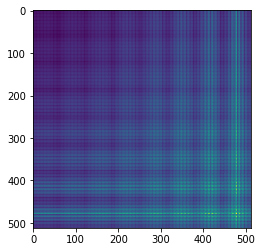

In [67]:
axs = plt.subplot()
axs.imshow(np.log(H))

# axs.imshow(J)




In [68]:
ii



0

In [69]:
# axs = plt.subplot()
# axs.plot(np.dot(H, vec))
# nD = J.shape[0]
# nC = mesh.nC
# Hdiag = H.diagonal()
# Hsorted = np.argsort(np.abs(Hdiag))[::-1]


# # data = diags.append(H.diagonal())
# row_ind = np.arange(mesh.nC).tolist()
# col_ind = np.arange(mesh.nC).tolist()


# skip = int(np.prod(mesh.vnC[:2])/4)
# residual = []
# for ii in range(6):
    
#     diags = []
#     offsets = []
#     for jj in range(0,ii+1):

        
#     #     data.append(H[Hsorted[jj],:])
#     #     row_ind.append(np.arange(mesh.nC).tolist())
#     #     col_ind.append((np.ones(mesh.nC, dtype=int) * Hsorted[jj]).tolist())

#     #     data.append(H[Hsorted[jj],:])
#     #     col_ind.append(np.arange(mesh.nC).tolist())
#     #     row_ind.append((np.ones(mesh.nC, dtype=int) * Hsorted[jj]).tolist())

#     #     data, row_ind, col_ind = np.hstack(data).tolist(), np.hstack(row_ind).tolist(), np.hstack(col_ind).tolist()

#     #     vals = np.unique(np.c_[data, row_ind, col_ind], axis=0)

#     #     Happrox = sp.sparse.csr_matrix((vals[:,0], (vals[:,1],vals[:,2])), shape=(mesh.nC, mesh.nC))


#     #     Happrox = H.copy()
#     #     Happrox[np.abs(Happrox)<2e-10] = 0

#         diags.append(np.diag(H, k=jj*skip))
#         offsets.append(jj*skip)

#         if jj > 0:
#             diags.append(np.diag(H, k=-jj*skip))
#             offsets.append(-jj*skip)
#     #     row_ind.append(np.arange((nC-jj*nD)).tolist())
#     #     col_ind.append(np.arange(jj*nD, nC).tolist())

#     #     data, row_ind, col_ind = np.hstack(data).tolist(), np.hstack(row_ind).tolist(), np.hstack(col_ind).tolist()
#     #     vals = np.unique(np.c_[data, row_ind, col_ind], axis=0)

#     # Happrox = sp.sparse.csr_matrix((vals[:,0], (vals[:,1],vals[:,2])), shape=(mesh.nC, mesh.nC))
#     Happrox = sp.sparse.diags(diags, offsets=offsets, shape=(mesh.nC, mesh.nC))
#     axs.plot(Happrox*vec)
#     residual.append(np.linalg.norm((Happrox*vec) - np.dot(H,vec)))

In [70]:
16*16


256

In [71]:
# Find nearest cells
tree = sp.spatial.cKDTree(locs)


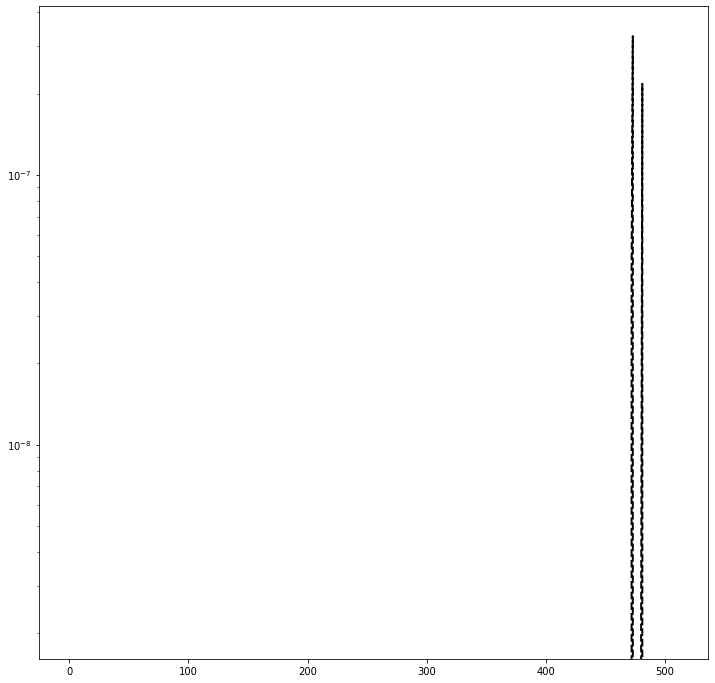

In [76]:
plt.figure(figsize=(12,12))
axs = plt.subplot()
axs.plot(np.dot(H, vec), 'k--', lw=2, zorder=20)
nD = J.shape[0]
nC = mesh.nC
Hdiag = H.diagonal()
Hsorted = np.argsort(np.abs(Hdiag))[::-1]

gridCC = mesh.gridCC.copy()
skip = int(np.prod(mesh.vnC[:2])/2)
data = []
row_ind = []
col_ind = []
    
residual = []
for ii in range(1):
    
    
       
    gridCC = mesh.gridCC.copy()
    gridCC[:,2] += ii * mesh.hz[0]
    
    rad, ind = tree.query(gridCC)
    
#     offsets = []
#     print(np.argsort(rad)[:3].tolist())
    
    for jj in np.argsort(rad)[:2].tolist():       

        data.append([H[:, jj].ravel()])
        col_ind.append(np.arange(mesh.nC).tolist())
        row_ind.append((np.ones(mesh.nC, dtype=int) * jj))

        data.append([H[jj, :].ravel()])
        row_ind.append(np.arange(mesh.nC).tolist())
        col_ind.append((np.ones(mesh.nC, dtype=int) * jj))


#     data, row_ind, col_ind = np.hstack(data).ravel(), np.hstack(row_ind), np.hstack(col_ind)

vals = np.unique(np.c_[
    np.hstack(data).ravel(), 
    np.hstack(row_ind), 
    np.hstack(col_ind)
], axis=0)

Happrox = sp.sparse.csr_matrix((vals[:,0], (vals[:,1].astype(int),vals[:,2].astype(int))), shape=(mesh.nC, mesh.nC))


# Happrox = sp.sparse.csr_matrix((vals[:,0], (vals[:,1],vals[:,2])), shape=(mesh.nC, mesh.nC))
# Happrox = sp.sparse.diags(diags, offsets=offsets, shape=(mesh.nC, mesh.nC))
# axs.plot(Happrox*vec)
axs.set_yscale('log')
residual.append(np.linalg.norm(Happrox*vec - np.dot(H,vec))/np.linalg.norm(np.dot(H,vec)))

In [73]:
indx


1911

In [74]:
np.prod(mesh.vnC[:2])



64

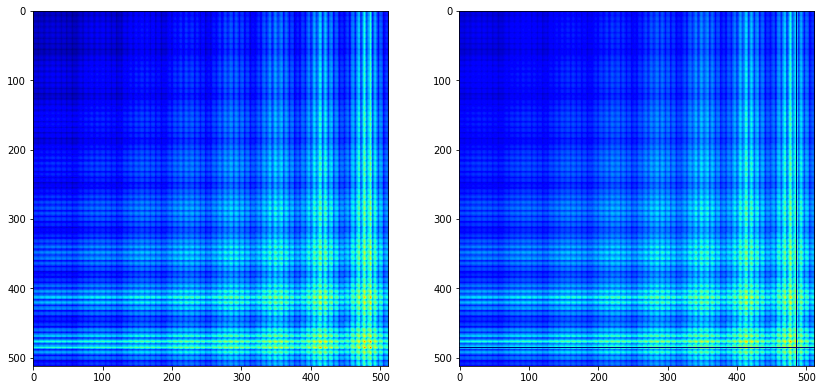

In [75]:
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(1,2,1)
plt.imshow(np.log(H), cmap='jet', vmin=np.log(H).min(), vmax=np.log(H).max())


ax2 = plt.subplot(1,2,2)
plt.imshow(np.log(H-Happrox.todense()+1e-8), cmap='jet', vmin=np.log(H).min(), vmax=np.log(H).max())









# for jj in Hsorted[:10].tolist():
#     plt.scatter(jj,jj, 3, 'r')


In [35]:
Happrox, Happrox.count_nonzero()/np.prod(H.shape)


(<512x512 sparse matrix of type '<class 'numpy.float64'>'
 	with 26919 stored elements in Compressed Sparse Row format>,
 0.10268783569335938)

In [252]:
%%time

aa = Happrox *vec

Wall time: 0 ns


In [235]:
%%time
aa = np.dot(prob.G.T, np.dot(prob.G, vec)).compute()

[-1.09462554e-08 -1.28141920e-08 -1.35511197e-08 -9.66185608e-09
 -1.11082213e-08 -1.16984037e-08 -8.34225571e-09 -9.45962313e-09
 -9.94710269e-09 -7.04683575e-09 -7.94349721e-09 -8.37894618e-09
 -5.78886004e-09 -6.57057583e-09 -7.00427288e-09 -1.20400667e-08
 -1.44114007e-08 -1.53595428e-08 -1.04833519e-08 -1.22348180e-08
 -1.29526912e-08 -8.94010425e-09 -1.02350115e-08 -1.07986295e-08
 -7.46453679e-09 -8.46867375e-09 -8.95412112e-09 -6.04996055e-09
 -6.91251429e-09 -7.38944910e-09 -1.32018503e-08 -1.62248254e-08
 -1.74617604e-08 -1.13242045e-08 -1.34349199e-08 -1.43104132e-08
 -9.53865722e-09 -1.10215714e-08 -1.16690894e-08 -7.88120641e-09
 -8.98586849e-09 -9.51945710e-09 -6.31422552e-09 -7.24503951e-09
 -7.75913886e-09 -1.43802163e-08 -1.82282172e-08 -1.98586254e-08
 -1.21420032e-08 -1.46563829e-08 -1.57217113e-08 -1.01112390e-08
 -1.17779889e-08 -1.25139662e-08 -8.28483370e-09 -9.47025834e-09
 -1.00462040e-08 -6.58267105e-09 -7.55644632e-09 -8.09699299e-09
 -1.54814126e-08 -2.03247

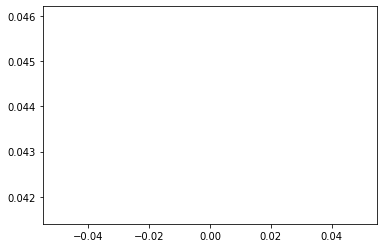

In [465]:
# Happrox = sp.sparse.diags(H.diagonal())
plt.plot(residual)







In [382]:
residual



[2.923335306984217e-08,
 3.005993254770805e-08,
 3.685883420168592e-08,
 4.2299146556087924e-08,
 4.8993926753202275e-08]